# Task 1

Bubble Sort Time: 0.078116 seconds
Merge Sort Time: 0.000000 seconds
Quick Sort Time: 0.000000 seconds


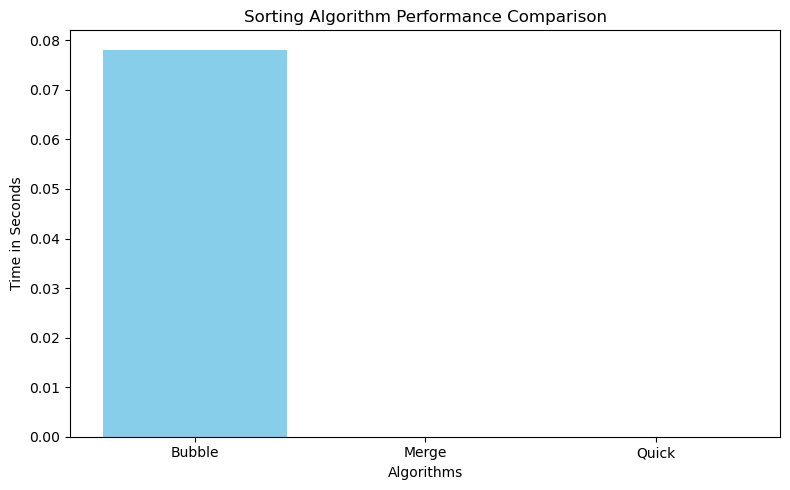

In [1]:
import random
import time
import matplotlib.pyplot as plt

def create_random_list(length, min_val, max_val):
    return [random.randint(min_val, max_val) for _ in range(length)]

def perform_bubble_sort(data):
    n = len(data)
    for i in range(n):
        for j in range(0, n - i - 1):
            if data[j] > data[j + 1]:
                data[j], data[j + 1] = data[j + 1], data[j]

def perform_merge_sort(data):
    if len(data) <= 1:
        return data
    midpoint = len(data) // 2
    left_half = perform_merge_sort(data[:midpoint])
    right_half = perform_merge_sort(data[midpoint:])
    return merge_parts(left_half, right_half)

def merge_parts(left, right):
    merged = []
    left_idx = right_idx = 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] < right[right_idx]:
            merged.append(left[left_idx])
            left_idx += 1
        else:
            merged.append(right[right_idx])
            right_idx += 1
    merged.extend(left[left_idx:])
    merged.extend(right[right_idx:])
    return merged

def perform_quick_sort(data):
    if len(data) <= 1:
        return data
    pivot = data[len(data) // 2]
    left = [x for x in data if x < pivot]
    middle = [x for x in data if x == pivot]
    right = [x for x in data if x > pivot]
    return perform_quick_sort(left) + middle + perform_quick_sort(right)

def calculate_time(algorithm, dataset, in_place=False):
    copied_data = dataset.copy()
    start = time.time()
    if in_place:
        algorithm(copied_data)
    else:
        _ = algorithm(copied_data)
    return time.time() - start

random_numbers = create_random_list(1000, 1, 10000)

bubble_time = calculate_time(perform_bubble_sort, random_numbers, in_place=True)
merge_time = calculate_time(perform_merge_sort, random_numbers)
quick_time = calculate_time(perform_quick_sort, random_numbers)

print(f"Bubble Sort Time: {bubble_time:.6f} seconds")
print(f"Merge Sort Time: {merge_time:.6f} seconds")
print(f"Quick Sort Time: {quick_time:.6f} seconds")

def draw_time_chart(labels, timings):
    plt.figure(figsize=(8, 5))
    plt.bar(labels, timings, color=['skyblue', 'lightgreen', 'salmon'])
    plt.xlabel("Algorithms")
    plt.ylabel("Time in Seconds")
    plt.title("Sorting Algorithm Performance Comparison")
    plt.tight_layout()
    plt.show()

draw_time_chart(['Bubble', 'Merge', 'Quick'], [bubble_time, merge_time, quick_time])

In [2]:
import time

def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n - 1) + fib_recursive(n - 2)

def fib_iterative(n):
    x, y = 0, 1
    for _ in range(n):
        x, y = y, x + y
    return x

def fib_memo(n, cache={}):
    if n in cache:
        return cache[n]
    if n <= 1:
        cache[n] = n
    else:
        cache[n] = fib_memo(n - 1, cache) + fib_memo(n - 2, cache)
    return cache[n]

def track_time(function, value):
    start = time.time()
    output = function(value)
    duration = time.time() - start
    return output, duration

inputs = [10, 20, 30, 40]
report = {}

for value in inputs:
    res_rec, time_rec = track_time(fib_recursive, value)
    res_it, time_it = track_time(fib_iterative, value)
    res_mem, time_mem = track_time(fib_memo, value)

    report[value] = {
        "Recursive": {"Value": res_rec, "Time": time_rec},
        "Iterative": {"Value": res_it, "Time": time_it},
        "Memoized": {"Value": res_mem, "Time": time_mem}
    }

for num, data in report.items():
    print(f"\nInput: {num}")
    print(f"Recursive   → {data['Recursive']['Time']:.6f}s, Result = {data['Recursive']['Value']}")
    print(f"Iterative   → {data['Iterative']['Time']:.6f}s, Result = {data['Iterative']['Value']}")
    print(f"Memoization → {data['Memoized']['Time']:.6f}s, Result = {data['Memoized']['Value']}")


Input: 10
Recursive   → 0.000000s, Result = 55
Iterative   → 0.000000s, Result = 55
Memoization → 0.000000s, Result = 55

Input: 20
Recursive   → 0.012390s, Result = 6765
Iterative   → 0.000000s, Result = 6765
Memoization → 0.000000s, Result = 6765

Input: 30
Recursive   → 0.264081s, Result = 832040
Iterative   → 0.000000s, Result = 832040
Memoization → 0.000000s, Result = 832040

Input: 40
Recursive   → 44.860100s, Result = 102334155
Iterative   → 0.000000s, Result = 102334155
Memoization → 0.000000s, Result = 102334155


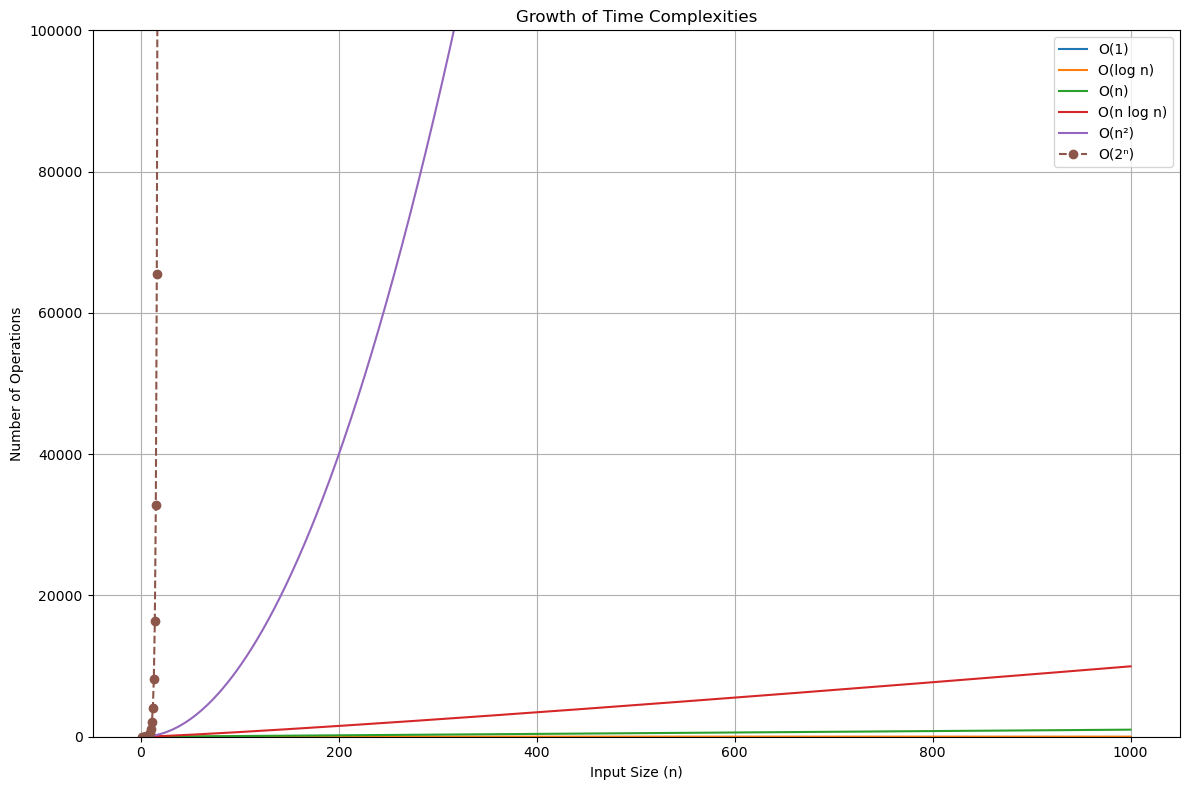

In [3]:
import matplotlib.pyplot as plt
import numpy as np

n_values = np.arange(1, 1001)

def complexity_constant(n): return np.ones_like(n)
def complexity_log(n): return np.log2(n)
def complexity_linear(n): return n
def complexity_nlogn(n): return n * np.log2(n)
def complexity_quadratic(n): return n ** 2
def complexity_exponential(n): return 2 ** n

y_const = complexity_constant(n_values)
y_log = complexity_log(n_values)
y_lin = complexity_linear(n_values)
y_nlogn = complexity_nlogn(n_values)
y_quad = complexity_quadratic(n_values)
small_n = n_values[n_values < 20]
y_exp = complexity_exponential(small_n)

plt.figure(figsize=(12, 8))
plt.plot(n_values, y_const, label="O(1)")
plt.plot(n_values, y_log, label="O(log n)")
plt.plot(n_values, y_lin, label="O(n)")
plt.plot(n_values, y_nlogn, label="O(n log n)")
plt.plot(n_values, y_quad, label="O(n²)")
plt.plot(small_n, y_exp, label="O(2ⁿ)", linestyle='--', marker='o')

plt.ylim(0, 100000)
plt.title("Growth of Time Complexities")
plt.xlabel("Input Size (n)")
plt.ylabel("Number of Operations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()